# Test of `invres()` on Multiple Channels

Original author: David Banas <capn.freako@gmail.com>  
Original date: August 28, 2025

Copyright &copy; 2025 David Banas; all rights reserved World wide.

## Introduction

Despite achieving a very good fit to the channel data used in the `ImpulseResponseFromSparameters.ipynb` notebook, the `invres()` function is failing to accurately convert the _partial fractions_ representation returned by the fitter into the _expanded polynomial_ form needed to proceed with further investigation.

Here, I'm trying to determine whether I chose a pathological channel, by chance, or if this is typical of complex fitting tasks.
To do that, I plan to run several of the P802.3dj test channels through: `fit` => `invres()` => `residue()`, comparing the output of `residue()` back to the original fit results.

In [2]:
from pathlib import Path
from pychopmarg.utility import get_channel_sets

CHNL_DATA_DIR = Path("chnl_data/P8023dj/KR")
channel_sets = get_channel_sets(CHNL_DATA_DIR)
print(f"Channel groups found in '{CHNL_DATA_DIR}':")
for grp, chnls in channel_sets.items():
    print(f"\t{grp:30s}:\t{len(chnls):4d} channels found.")


Channel groups found in 'chnl_data\P8023dj\KR':
	mellitz_3dj_02_elec_230504    :	  27 channels found.
	mellitz_3dj_03_elec_230504    :	  25 channels found.
	shanbhag_3dj_02_2305          :	   4 channels found.
	weaver_3dj_02_2305            :	  36 channels found.


In [10]:
# The full set of available test channels:
ch_sets = {}
for grp in channel_sets:
    ch_grp = []
    for ch_set in channel_sets[grp]:
        ch_grp.append(ch_set["THRU"][0])
    ch_sets.update({grp: ch_grp})


mellitz_3dj_02_elec_230504:


C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear system was ill-conditioned (max. condition number was 641998333799.1284).
  vf.vector_fit(n_poles_real=N_REAL, n_poles_cmplx=N_COMP)
C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear system was ill-conditioned (max. condition number was 879915328046.2092).
  vf.vector_fit(n_poles_real=N_REAL, n_poles_cmplx=N_COMP)
C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear syste

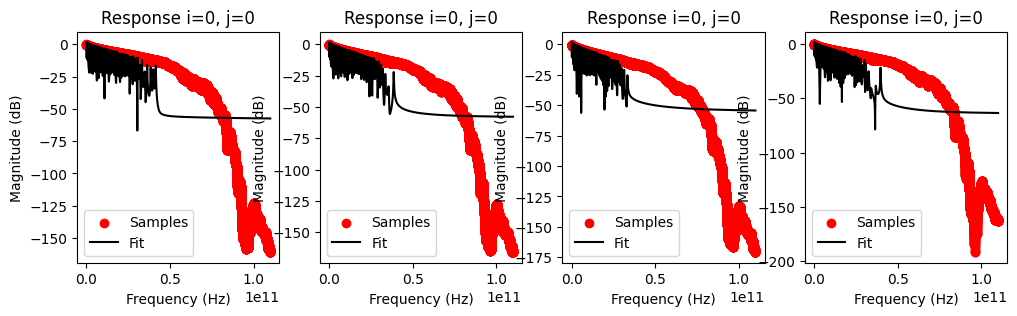

mellitz_3dj_03_elec_230504:


C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear system was ill-conditioned (max. condition number was 600927426426.685).
  vf.vector_fit(n_poles_real=N_REAL, n_poles_cmplx=N_COMP)
C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear system was ill-conditioned (max. condition number was 269938533019.9626).
  vf.vector_fit(n_poles_real=N_REAL, n_poles_cmplx=N_COMP)
C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear system

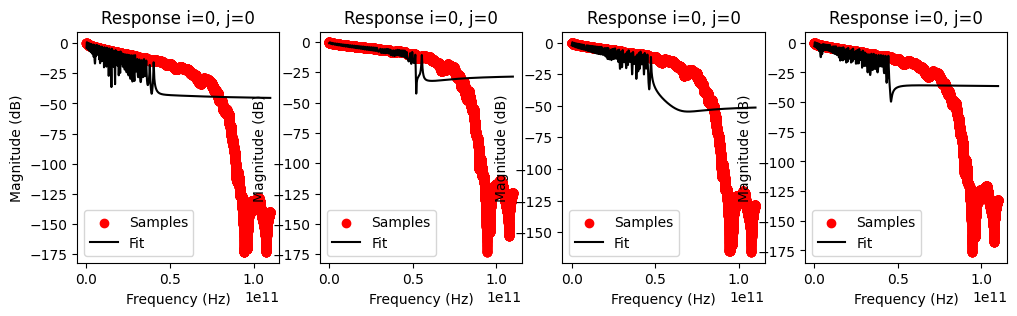

shanbhag_3dj_02_2305:


C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear system was ill-conditioned (max. condition number was 503478736079.23315).
  vf.vector_fit(n_poles_real=N_REAL, n_poles_cmplx=N_COMP)
C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear system was ill-conditioned (max. condition number was 769130526666.0082).
  vf.vector_fit(n_poles_real=N_REAL, n_poles_cmplx=N_COMP)
C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear syst

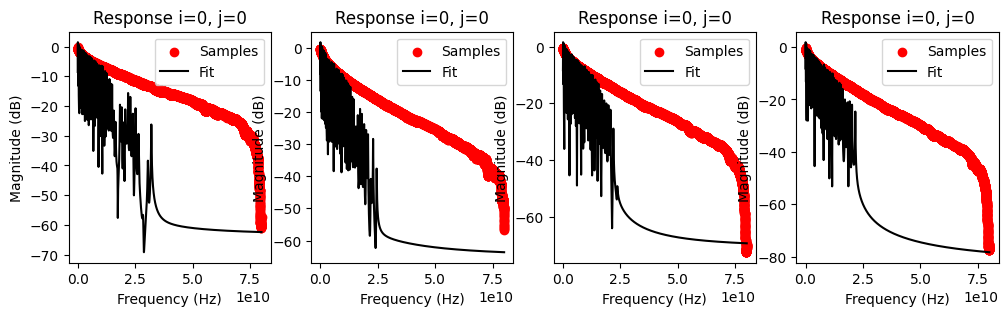

weaver_3dj_02_2305:


C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear system was ill-conditioned (max. condition number was 5827548895179.192).
  vf.vector_fit(n_poles_real=N_REAL, n_poles_cmplx=N_COMP)
C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear system was ill-conditioned (max. condition number was 6200985006354.589).
  vf.vector_fit(n_poles_real=N_REAL, n_poles_cmplx=N_COMP)
C:\Users\davibana\tmp\ipykernel_10260\1809276014.py:37: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly.
Hint: the linear syste

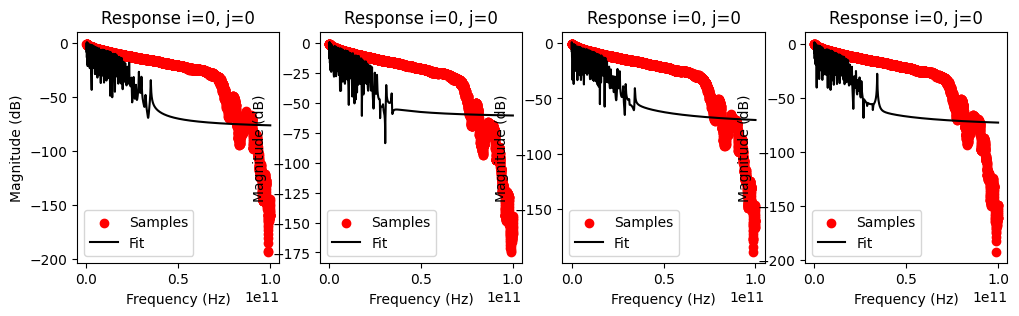

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import skrf as rf

N_REAL = 10  # Number of real poles used in fitting.
N_COMP = 40  # Number of complex poles used in fitting.

def sdd(ntwk: rf.Network) -> rf.Network:
    """
    Extract the diff-diff quadrant of the mixed mode equivalent of the given single-ended network.

    Args:
        ntwk: Single-ended 4-port network from which to extract Sdd.

    Returns:
        The diff-diff quadrant of the mixed mode network equivalent to the given single-ended network.

    Raises:
        ValueError: If the given network is not 4-port.

    Notes:
        1. Assumes "1->2 / 3->4" port ordering.
    """
    ntwk_mm = ntwk.copy()
    ntwk_mm.renumber([0, 1, 2, 3], [0, 2, 1, 3])
    ntwk_mm.se2gmm(p=2)
    return ntwk_mm.subnetwork([0, 1])

# Run channels through vector fitting, recording average fitting error for each.
for grp in ch_sets:
    print(f"{grp}:")
    plt.figure(figsize=(12, 3))
    for n, ch_path in enumerate(ch_sets[grp][:4]):
        ntwk = rf.Network(ch_path)
        ntwk_dd = sdd(ntwk)
        vf = rf.VectorFitting(ntwk_dd.s21)
        vf.vector_fit(n_poles_real=N_REAL, n_poles_cmplx=N_COMP)
        plt.subplot(141 + n)
        vf.plot_s_db()
    plt.show()
